In [3]:
import numpy as np 
import matplotlib.pyplot as plt

In [12]:
class holling1():
    
    def __init__(self,anfang,wachstum):
        
        self.s = anfang
        self.w = wachstum
        self.x = []
        self.y = []
        
    def growth(self,time):
        
        dt = 0.00001
        c = 0
        start = self.s
        x = []
        y = []
        
        while c < time:
        
            dI = (self.w)*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def plot(self):
        
        plt.plot(self.x,self.y) 
        

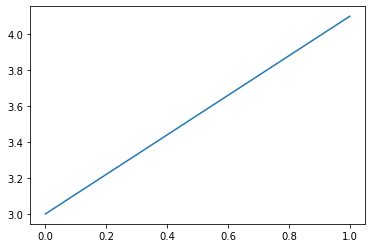

In [13]:
a = holling1(3,1.1)
a.growth(1)
a.plot()

In [64]:
class pandemie():    # R-Wert = (beta * N)/gamma, wenn größer 1 Pandemie, wenn kleiner nicht
    
    def __init__(self,infected,popul,beta,gamma):
        
        self.infected = infected
        self.popul = popul
        self.beta = beta
        self.gamma = gamma
        self.x = []
        self.y = []
    
    def growth(self, time):
        
        dt = 0.00001
        c = 0
        start = self.infected
        x = []
        y = []
        
        while c < time:
        
            dI = ((self.beta*self.popul-self.gamma)*start-self.beta*start**2)*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def r(self):
        
        wert = self.beta*self.popul/self.gamma
        
        return wert
    
    def plot(self):
        
        plt.plot(self.x,self.y) 

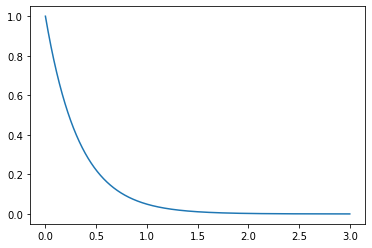

In [69]:
a = pandemie(infected=1,popul=100,beta=0.02,gamma=5)
#a.r()
a.growth(3)
a.plot()

In [7]:
class malthus():  # begrenztes Wachstum
    
    def __init__(self,anfang,r):
        
        self.anfang = anfang
        self.r = r
        self.x = []
        self.y = []
    
    def growth(self, time):
        
        dt = 0.00001
        c = 0
        start = self.anfang
        x = []
        y = []
        
        while c < time:
        
            dI = (self.r*start)*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def plot(self):
        
        plt.plot(self.x,self.y) 

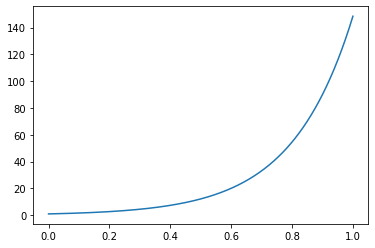

In [8]:
a = malthus(1,5)
a.growth(1)
a.plot()

In [5]:
class verhulst():  # begrenztes Wachstum
    
    def __init__(self,anfang,k,r):
        
        self.anfang = anfang
        self.k = k
        self.r = r
        self.x = []
        self.y = []
    
    def growth(self, time):
        
        dt = 0.00001
        c = 0
        start = self.anfang
        x = []
        y = []
        
        while c < time:
        
            dI = (self.r*start*(1-start/self.k))*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def plot(self):
        
        plt.plot(self.x,self.y) 

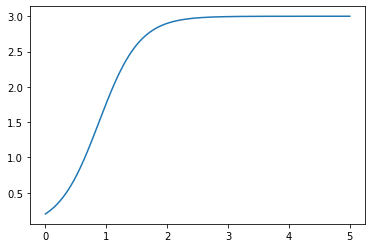

In [7]:
b = verhulst(anfang=0.2,k=3,r=3)
b.growth(5)
b.plot()

In [70]:
class fischfang():   # begrenztes Wachstum mit konstanter Abfischrate

    def __init__(self,anfang,k,r,q):
        
        self.anfang = anfang
        self.k = k
        self.r = r
        self.q = q
        self.x = []
        self.y = []
    
    def growth(self, time):  
        
        dt = 0.00001
        c = 0
        start = self.anfang
        x = []
        y = []
        
        while c < time:
        
            dI = (self.r*start*(1-start/self.k)-self.q)*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def plot(self):
        
        plt.plot(self.x,self.y)
    
    def check(self):
        
        klammer = self.k**2/4 - self.k*self.q/self.r 
        
        if klammer >= 0:
            
            a0 = self.k/2 - klammer**0.5
            a1 = self.k/2 + klammer**0.5
            
            print(f"Untere Grenze: {a0} \n Obere Grenze: {a1}")
            
        else:
            
            print("Leider gings nicht")

In [71]:
1*100*(1-100/400)-75 # Startwert

0.0

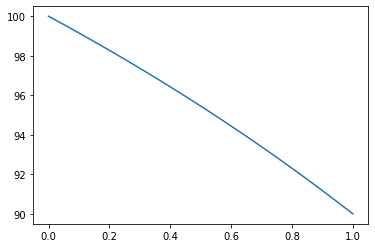

In [73]:
c = fischfang(anfang=100,k=300,r=1,q=75)
c.growth(1)
c.plot()

In [25]:
(400**2/4-400*75)**0.5

100.0

In [23]:
class elementar2():  
    
    def __init__(self,anfang,k,r,rho,zeta):
        
        self.anfang = anfang
        self.k = k
        self.r = r
        self.x = []
        self.y = []
        
        self.rho = rho
        self.zeta = zeta
    
    def growth(self, time):
        
        dt = 0.00001
        c = 0
        start = self.anfang
        x = []
        y = []
        
        while c < time:
        
            dI = (self.r*start*(1-start/self.k)-self.rho*start**2/(start**2+self.zeta**2))*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def plot(self):
        
        plt.plot(self.x,self.y) 

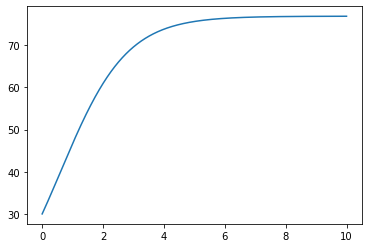

In [25]:
k = elementar2(anfang=30,k=80,r=1,rho=3,zeta=1)
k.growth(10)
k.plot()

In [36]:
class lotka_volterra():
    
    def __init__(self,a,b,d,g,max_time=10,dt=0.001,x=2,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x-b*x*y   # a = reproduction rate and b = fatal attacks
            y_change = d*x*y-g*y   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()
        

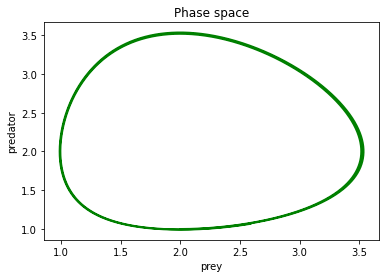

In [37]:
lotka_volterra(a=2,b=1,d=1,g=2,max_time=10).gegeneinander()

In [1]:
class lotka_volterra_modified():
    
    def __init__(self,a,b,d,g,max_time=10,dt=0.001,x=2,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x*(1-x/b)-b*x*y   # a = reproduction rate and b = fatal attacks
            y_change = d*x*y-g*y   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()
        

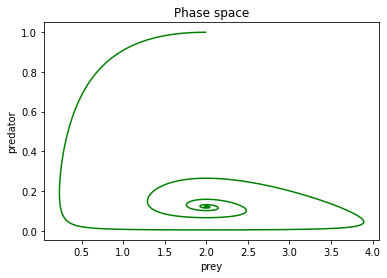

In [4]:
lotka_volterra_modified(a=1,b=5,d=1,g=2,max_time=40,x=2).gegeneinander()

In [5]:
class lotka_volterra_insekten():
    
    def __init__(self,a,b,d,g,epsilon,delta,max_time=10,dt=0.001,x=2,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x-b*x*y-epsilon*x   # a = reproduction and b = fatal attacks
            y_change = d*x*y-g*y-delta*y   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()

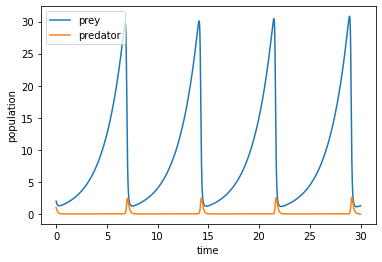

In [6]:
lotka_volterra_insekten(a=1,b=5,d=1,g=2,epsilon=0.5,delta=7,max_time=30).zeit()

In [7]:
class lotka_volterra_modK():
    
    def __init__(self,a,b,d,g,k,max_time=10,dt=0.001,x=2,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x*(1-x/k)-b*x*y   # a = reproduction rate and b = fatal attacks
            y_change = d*x*y-g*y   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()
        

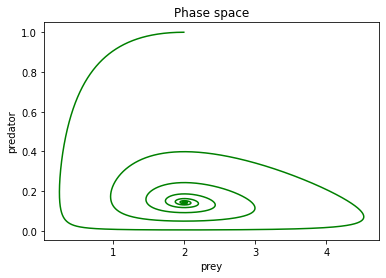

In [8]:
lotka_volterra_modK(a=1,b=5,d=1,g=2,k=7,max_time=40,x=2).gegeneinander()

In [9]:
class lotka_volterra_hollingII():
    
    def __init__(self,a,b,d,g,k,c,max_time=10,dt=0.001,x=2,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x*(1-x/k)-b*x*y/(c+x)   # a = reproduction rate and b = fatal attacks
            y_change = d*x*y-g*y   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()

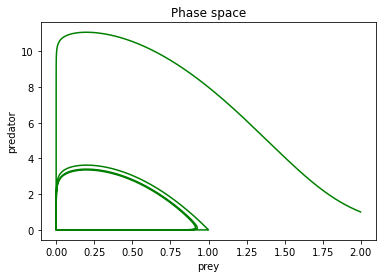

In [40]:
lotka_volterra_hollingII(a=1,b=0.7,d=5,g=1,k=1,c=0.2,max_time=100,x=2).gegeneinander()

In [26]:
class lotka_volterra_hollingIII():
    
    def __init__(self,a,b,d,g,k,c,max_time=10,dt=0.001,x=20,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x*(1-x/k)-b*x**2*y/(c**2+x**2)   # a = reproduction rate and b = fatal attacks
            y_change = d*x*y-g*y   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()

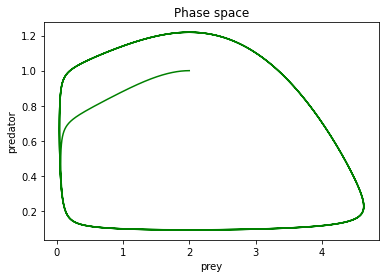

In [43]:
lotka_volterra_hollingIII(a=1,b=1.5,d=0.1,g=0.2,k=5,c=0.2,max_time=100,x=2).gegeneinander()

In [33]:
class lotka_volterra_grenz():  #Korrektur gibt Grenzzyklus
                               #dank Kapazität für beide und HollingII
    
    def __init__(self,a,k,b,c,d,e,max_time=10,dt=0.001,x=20,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = a*x*(1-x/k)-b*x*y/(c+x)   # a = reproduction rate and b = fatal attacks
            y_change = d*y*(1-e*y/x)   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()

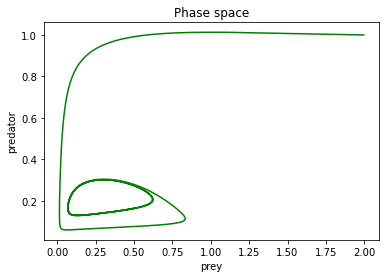

In [34]:
lotka_volterra_grenz(a=1,e=1,k=1,b=1.5,c=0.2,d=0.1,max_time=100,x=2).gegeneinander()

In [40]:
class bifurk():  # begrenztes Wachstum
    
    def __init__(self,anfang,mu):
        
        self.anfang = anfang
        self.r = mu
        self.x = []
        self.y = []
    
    def growth(self, time):
        
        dt = 0.001
        c = 0
        start = self.anfang
        x = []
        y = []
        
        while c < time:
        
            dI = (self.r*start*(1-start)-start)*dt
            
            x.append(c)
            y.append(start)
            
            start += dI
            c += dt
            
            
        self.x = x
        self.y = y
        
        return start
    
    def plot(self):
        
        plt.plot(self.x,self.y) 

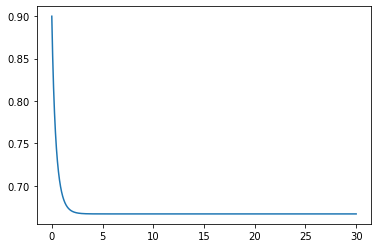

In [41]:
a = bifurk(anfang=0.9,mu=3)
a.growth(30)
a.plot()

In [27]:
class bifurk_reihe(): # Bifurktaion logistische Gleichung als Reihe
    
    def __init__(self,start,r):
        
        self.start = start
        self.r = r
        self.t = []
        self.x = []
        
    def arrays(self,Ende):
        
        dt = 0.0001
        a = int(Ende/dt)
        t = []
        x = []
        zeit = 0
        y = self.start
        
        for i in range(a):
            
            drauf = self.r*y*(1-y)
            x.append(drauf)
            zeit += dt
            t.append(zeit)
            y = drauf
            
        self.t = t
        self.x = x
            
    def plot(self):
        
        plt.plot(self.t, self.x)          

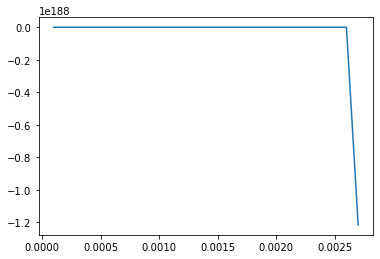

In [41]:
a = bifurk_reihe(start=0.9,r=4.2)
a.arrays(0.01)
a.plot()

In [70]:
class bifurk_func():
    
    '''
    Reihe einfach umgeschrieben mit dI also deltaX.
    Das mal dt zu nehmen führt dazu,
    '''
    
    def __init__(self,start,r):
        
        self.start = start
        self.r = r
        self.t = []
        self.x = []
        
    def arrays(self,Ende):
        
        dt = 0.0001
        a = int(Ende/dt)
        t = []
        x = []
        zeit = 0
        y = self.start
        
        for i in range(a):
            
            dI = self.r*y*(1-y)-y
            drauf = y + dI
            x.append(drauf)
            zeit += dt
            t.append(zeit)
            y = drauf
            
        self.t = t
        self.x = x
            
    def plot(self):
        
        plt.plot(self.t, self.x)          

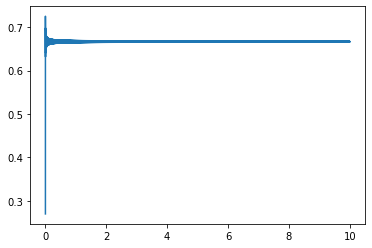

In [71]:
a = bifurk_func(start=0.9,r=3.0)
a.arrays(10)
a.plot()

In [59]:
class hopf():
    
    def __init__(self,a,max_time=10,dt=0.001,x=20,y=1):
        
        self.max_time = max_time
        self.dt = dt
        
        x_graph = []
        y_graph = []
    
        i = 0
        steps = max_time/dt
    
        while i < steps:
    
            x_change = -y+x*(a-x**2-y**2)   # a = reproduction rate and b = fatal attacks
            y_change = x+y*(a-x**2-y**2)   # d = successful attacks and g = death rate
    
            x = x + x_change*dt
            y = y + y_change*dt
    
            x_graph.append(x)
            y_graph.append(y)
        
            i += 1
            
        self.x_graph = x_graph
        self.y_graph = y_graph
    
    def zeit(self):
    
        t = np.arange(0,self.max_time,self.dt)
    
        plt.plot(t,self.x_graph, label = "prey")
        plt.plot(t,self.y_graph, label = "predator") 
        plt.xlabel("time")
        plt.ylabel("population")
        plt.legend()
        plt.show()
    
    def gegeneinander(self):
        
        plt.plot(self.x_graph,self.y_graph, color = "green")
        plt.xlabel("prey")
        plt.ylabel("predator")
        plt.title("Phase space")
        plt.show()

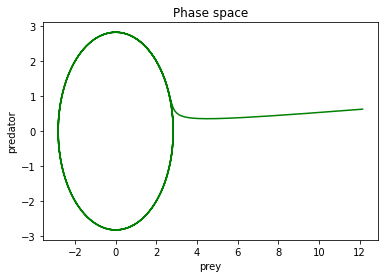

In [60]:
a = hopf(a=8,max_time=20)
a.gegeneinander()